#import files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# download the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

100%|██████████| 146k/146k [00:00<00:00, 63.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


In [ ]:
os.listdir(path)

['shopping_trends_updated.csv', 'shopping_trends.csv']

In [ ]:
file_path=f"{path}/shopping_trends_updated.csv"
df=pd.read_csv(file_path)

#Data understanding

In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')



- **Customer ID**: A unique identifier for each customer.
- **Age**: The customer's age, usually in years.
- **Gender**: Gender identity (e.g., Male, Female, Non-binary).
- **Item Purchased**: The specific product a customer bought.
- **Category**: Broad grouping of the item (e.g., Electronics, Apparel).
- **Purchase Amount (USD)**: Total amount spent on that purchase.
- **Location**: Geographic information—could be city, state, or country.
- **Size**: Size of the product—applicable mostly to apparel or footwear.
- **Color**: The color of the item purchased.
- **Season**: The time of year the purchase was made (e.g., Summer, Winter).
- **Review Rating**: Customer’s rating of the item, probably on a scale (like 1–5).
- **Subscription Status**: Whether the customer is subscribed to a service (e.g., Yes/No).
- **Shipping Type**: The delivery method (e.g., Standard, Express).
- **Discount Applied**: Whether a discount was used in the transaction.
- **Promo Code Used**: Indicates if a promo code was applied.
- **Previous Purchases**: Number or details of past transactions by that customer.
- **Payment Method**: How the customer paid (e.g., Credit Card, PayPal).
- **Frequency of Purchases**: How often the customer shops—could be monthly, annually, etc.



In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


-total customers 3900
- avrage age of customer 44 (29to 59 can varies)
-min_max amount to be paid is 20 and 100
-avrage people paid 60 doalars max
-avg. ranting is 3.7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

#Data cleaning

#missing value & duplicate data and treatment

In [ ]:
df.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df.duplicated().sum()

np.int64(0)

-no misiing value & dupliacted data

# Eda

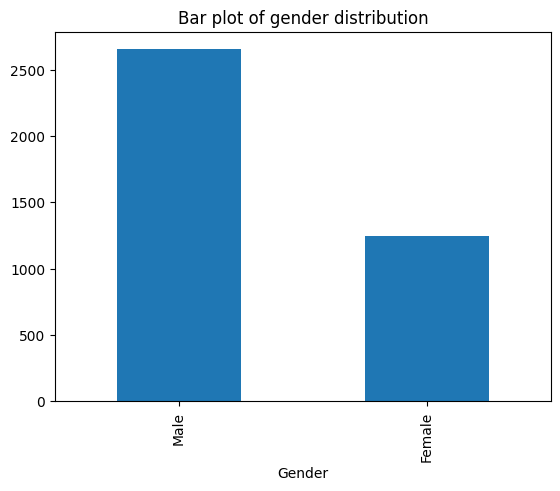

In [ ]:
df.Gender.value_counts().plot(kind='bar')
plt.title("Bar plot of gender distribution")
plt.show()

max of our customer are male

Axes(0.125,0.377576;0.352273x0.234848)


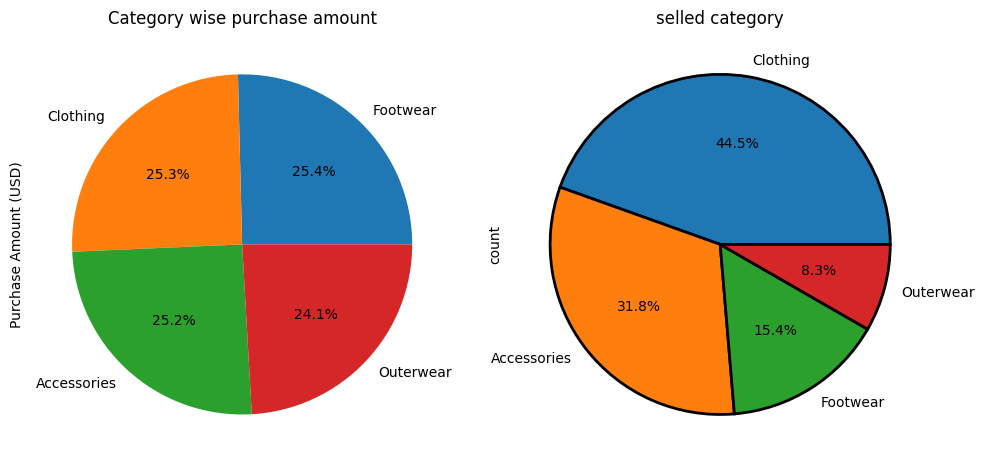

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.title("Category wise purchase amount")
avg_amount_by_cat=df.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False)
print(avg_amount_by_cat.plot(kind='pie',autopct="%1.1f%%"))

plt.subplot(1,2,2)
plt.title("selled category")
df['Category'].value_counts().plot(kind='pie',autopct="%1.1f%%",wedgeprops={'linewidth': 2, 'edgecolor': 'black'},)
plt.tight_layout()
plt.show()

Most selled category is clothing(44.5) with 25.3% selled amount of all
and

 least selled category is outerwear(8.3) but with 24.1 percent sell



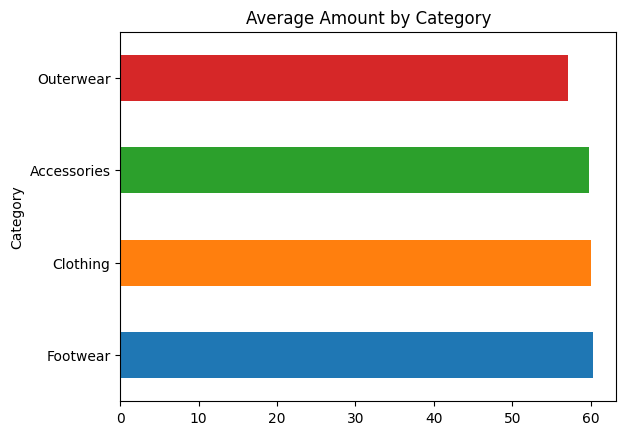

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red


avg_amount_by_cat.plot(kind='barh', color=colors)


plt.title("Average Amount by Category")
plt.show()

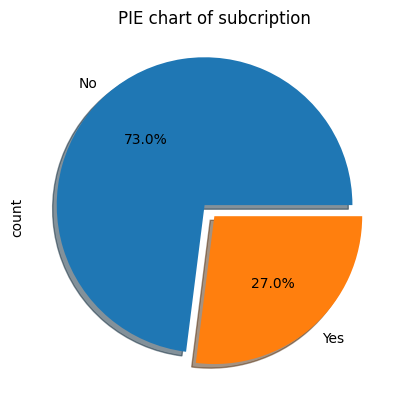

In [ ]:
df['Subscription Status'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0.1,0],shadow=True)
plt.title("PIE chart of subcription")
plt.show()

only 27 % people have subcription

In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.groupby("Season")['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Summer,55777
Winter,58607


 our highest sale in in fall seasion and lowest is in summer


<Figure size 1500x500 with 0 Axes>

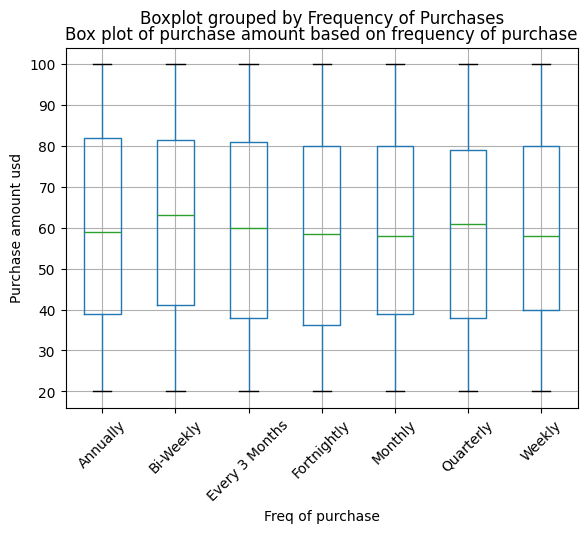

In [ ]:
plt.figure(figsize=(15,5))
df.boxplot(column="Purchase Amount (USD)",by='Frequency of Purchases')
plt.title("Box plot of purchase amount based on frequency of purchase")

plt.xlabel("Freq of purchase")
plt.ylabel("Purchase amount usd")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby("Frequency of Purchases")["Previous Purchases"].median()

,Previous Purchases
Frequency of Purchases,
Annually,24.0
Bi-Weekly,24.0
Every 3 Months,24.0
Fortnightly,26.0
Monthly,25.0
Quarterly,28.0
Weekly,26.0


In [ ]:
df['Payment Method'].value_counts().sort_values(ascending=False)

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


most people are using paypal

In [ ]:
df.groupby("Payment Method")['Purchase Amount (USD)'].sum().sort_values(ascending=False)

,Purchase Amount (USD)
Payment Method,
Credit Card,40310
PayPal,40109
Cash,40002
Debit Card,38742
Venmo,37374
Bank Transfer,36544


most total high amount are recvied with credit card paypal cash

In [ ]:
#to get the mean purchase amount over all country by their purchased item
#value= what we need,   index(row) & columns>> with which (loc & item),,aggfunc= give mean value of all item puchase value by thire loc
pd.pivot_table(df,values='Purchase Amount (USD)',index='Location',columns='Item Purchased',aggfunc='mean')

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.000000,26.500000,52.000000,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.200000,54.333333,49.000000,68.666667,79.500000,93.500000,62.666667,40.500000,52.500000
Alaska,74.600000,76.750000,67.500000,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.500000,80.000000,76.666667,87.333333,73.333333,74.250000,83.000000,50.333333,56.750000
Arizona,48.600000,84.500000,61.000000,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.000000,87.000000,46.000000,68.500000,78.500000,61.000000,66.000000,70.400000,62.000000
Arkansas,90.000000,55.000000,66.000000,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.000000,59.500000,95.000000,44.500000,69.000000,60.500000,56.000000,71.500000,52.000000
California,57.400000,61.666667,39.500000,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.800000,NaN,63.333333,56.000000,73.000000,83.000000,69.400000,42.000000,69.000000
Colorado,57.000000,68.500000,55.000000,NaN,46.000000,39.750000,64.500000,51.250000,61.333333,50.500000,...,68.000000,64.500000,67.500000,95.000000,41.200000,53.500000,NaN,34.000000,58.000000,59.000000
Connecticut,60.000000,47.666667,67.400000,64.250000,44.500000,65.000000,63.000000,53.500000,22.000000,63.000000,...,68.250000,62.333333,51.750000,59.500000,54.000000,NaN,61.000000,43.000000,NaN,39.000000
Delaware,33.000000,41.500000,42.200000,44.500000,57.500000,46.000000,72.200000,51.000000,57.400000,79.333333,...,54.000000,45.333333,58.200000,43.000000,66.000000,39.500000,80.000000,45.500000,35.000000,66.666667
Florida,59.000000,94.000000,31.000000,51.500000,51.166667,48.500000,51.666667,67.000000,54.000000,64.250000,...,58.500000,66.333333,26.000000,89.500000,44.500000,64.000000,33.500000,59.000000,56.000000,56.000000


In [ ]:
df.groupby("Size")['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Size,
L,58.563153
M,59.924217
S,61.037707
XL,60.090909


the most purchased size is S
and least is L

In [ ]:
pd.set_option('display.max_rows', None)
df.groupby('Color')['Category'].value_counts()

Color      Category   
Beige      Clothing       65
           Accessories    44
           Footwear       24
           Outerwear      14
Black      Clothing       81
           Accessories    51
           Footwear       25
           Outerwear      10
Blue       Accessories    59
           Clothing       49
           Footwear       25
           Outerwear      19
Brown      Clothing       61
           Accessories    44
           Footwear       24
           Outerwear      12
Charcoal   Clothing       73
           Accessories    55
           Footwear       15
           Outerwear      10
Cyan       Clothing       76
           Accessories    47
           Footwear       27
           Outerwear      16
Gold       Clothing       62
           Accessories    41
           Footwear       24
           Outerwear      11
Gray       Clothing       62
           Accessories    59
           Footwear       23
           Outerwear      15
Green      Clothing       78
           Accessories    53
           Footwear       24
           Outerwear      14
Indigo     Clothing       59
           Accessories    52
           Footwear       25
           Outerwear      11
Lavender   Clothing       60
           Accessories    49
           Footwear       22
           Outerwear      16
Magenta    Clothing       59
           Accessories    58
           Footwear       22
           Outerwear      13
Maroon     Clothing       83
           Accessories    41
           Footwear       26
           Outerwear       8
Olive      Accessories    66
           Clothing       61
           Footwear       31
           Outerwear      19
Orange     Clothing       78
           Accessories    44
           Footwear       24
           Outerwear       8
Peach      Clothing       65
           Accessories    58
           Footwear       18
           Outerwear       8
Pink       Clothing       73
           Accessories    39
           Footwear       28
           Outerwear      13
Purple     Clothing       72
           Accessories    40
           Footwear       27
           Outerwear      12
Red        Clothing       68
           Accessories    54
           Footwear       16
           Outerwear      10
Silver     Clothing       80
           Accessories    51
           Footwear       28
           Outerwear      14
Teal       Clothing       84
           Accessories    47
           Footwear       27
           Outerwear      14
Turquoise  Clothing       65
           Accessories    50
           Footwear       17
           Outerwear      13
Violet     Clothing       79
           Accessories    41
           Footwear       30
           Outerwear      16
White      Clothing       69
           Accessories    41
           Footwear       17
           Outerwear      15
Yellow     Clothing       75
           Accessories    56
           Footwear       30
           Outerwear      13
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

df.groupby('Frequency of Purchases')['Item Purchased'].value_counts(ascending=False)

# group={}
# for i in df['Frequency of Purchases'].unique():
#   group[i]=df[df['Frequency of Purchases']==i]


# for i in group:
#   print(i,'_______________')
#   print(pd.DataFrame(group[i])["Item Purchased"].value_counts(ascending=False))

Frequency of Purchases  Item Purchased
Annually                Blouse            32
                        Dress             31
                        Shirt             31
                        Scarf             29
                        Socks             29
                        Jewelry           26
                        Sandals           26
                        Shoes             26
                        Belt              24
                        Coat              23
                        Backpack          22
                        Gloves            22
                        Sweater           22
                        Handbag           21
                        Hat               21
                        Pants             21
                        Jacket            20
                        Jeans             20
                        Skirt             20
                        Sneakers          20
                        T-shirt           20
                        Sunglasses        19
                        Shorts            17
                        Boots             15
                        Hoodie            15
Bi-Weekly               Jewelry           32
                        Blouse            31
                        Sweater           29
                        Hoodie            27
                        Shorts            27
                        Belt              24
                        Socks             24
                        Boots             23
                        Gloves            23
                        Shirt             23
                        Sunglasses        23
                        Backpack          21
                        Sandals           21
                        Coat              20
                        Dress             20
                        Handbag           20
                        Jacket            20
                        Scarf             20
                        Shoes             20
                        Pants             19
                        Skirt             19
                        T-shirt           19
                        Hat               17
                        Sneakers          16
                        Jeans              9
Every 3 Months          Blouse            31
                        Handbag           31
                        Jacket            29
                        Dress             28
                        Belt              27
                        Sandals           27
                        T-shirt           26
                        Jewelry           25
                        Pants             25
                        Shoes             24
                        Shorts            24
                        Skirt             24
                        Socks             24
                        Backpack          23
                        Hoodie            23
                        Sneakers          22
                        Sweater           22
                        Scarf             21
                        Hat               20
                        Shirt             20
                        Boots             19
                        Coat              18
                        Jeans             18
                        Sunglasses        17
                        Gloves            16
Fortnightly             Sneakers          28
                        Coat              27
                        Jacket            26
                        Boots             25
                        Sweater           25
                        Sandals           24
                        Shorts            24
                        Skirt             24
                        Sunglasses        24
                        Scarf             23
                        Backpack          22
                        Gloves            21
                        Handbag           21
 

1. ✅ High Turnover Essentials (Weekly / Bi-Weekly / Fortnightly)
Key Items:

**Sweater, Skirt, Shirt, Pants, Shorts, Boots, Hoodie, Jewelry, Socks, Sunglasses, Coat**

📌 **Insights**:
These are likely wardrobe essentials or seasonal staples.

They show frequent repurchase behavior, ideal for recurring sales.

💼 **Business Actions**:
Bundle Essentials: Offer mix-and-match packages (e.g., 2 T-shirts + 1 pair of Shorts).

Restock Alerts: Allow users to subscribe for back-in-stock or recurring delivery.

Subscription Box: A curated monthly or seasonal apparel box featuring these items.



2. 🎯 Mid-Frequency Fashion (Monthly / Every 3 Months / Quarterly)
Key Items:

**Pants, Shirt, Dress, Hat, Jacket, T-shirt, Scarf, Sandals, Handbag, Jeans**

📌**Insights**:
These items are likely seasonally refreshed fashion or functional wear.

Customers buy them routinely, perhaps with each season or event cycle.

💼 **Business Actions**:
Seasonal Campaigns: Launch spring/summer/fall refresh lines using these items.

Personalized Offers: Target previous buyers with style refresh suggestions.

Email Retargeting: After 90 days, suggest restocking similar styles or colors.

In [ ]:
df["Previous Purchases"].sort_values(ascending=False).head(50)

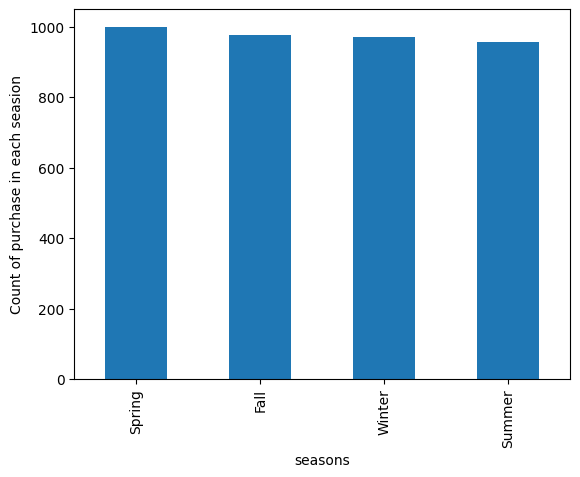

In [ ]:
df.Season.value_counts().plot(kind='bar')
plt.xlabel("seasons")
plt.ylabel("Count of purchase in each seasion")
plt.show()

Season wise sell plot

<Axes: title={'center': 'Review Rating'}, xlabel='Gender'>

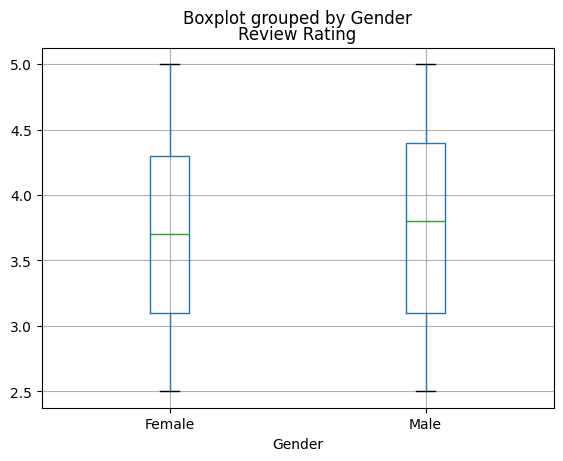

In [ ]:
df.boxplot(column="Review Rating",by="Gender")

avg. male customer are more satified with high rating then female